## Creating Logistic Regression from Start

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Steps:**
1. Define function for prediction
2. Define Cost Function
3. Define function to calculate gradients
4. Define function to get gradient descent
5. Run prediction function on weights and bias found using Gradient Descent

### Step 1.

<a name="2.3"></a>
### 2.3  Sigmoid function

Recall that for logistic regression, the model is represented as

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

In [35]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """

    g = 1 / (1+np.exp(-z))

    return g

<a name="toc_15456_3"></a>
# Model Prediction With Multiple Variables
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).

In [36]:
def predict(w, b, x):

    """
    Function to calculate the predictions for Linear Regression Model
    Args:
    x : Example with multiple features
    b : model bias
    w : model weights
    Returns:
        p (scalar): The prediction for the given inputs
    """
    m, n = x.shape
    p = np.zeros(m)
    z_wb = 0

    for i in range(m):
        z_wb = 0
        z_wb += np.dot(x[i], w) + b
        f_wb = sigmoid(z_wb)
        p[i] = f_wb >=0.6
    return p

### Step 2:


<a name="toc_15456_4"></a>
# Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [37]:
def cost(w,b,x,y):
    m = len(x)
    cost = 0.0
    for i in range(m):
        z_i = np.dot(w, x[i]) +b
        f_wb_i = sigmoid(z_i)
        cost = cost + -y[i]*np.log(f_wb_i + 1e-15) - (1-y[i])*np.log(1-f_wb_i + 1e-15)
    cost = cost/(m)
    return cost

### Step 3 and 4:

<a name="toc_15456_5"></a>
# Gradient Descent With Multiple Variables


where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [38]:
def compute_gradient(w,b,x,y):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """
    m,n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        z_i = np.dot(w,x[i]) + b
        f_wb_i = sigmoid(z_i)
        err = f_wb_i - y[i]

        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * x[i,j]
        dj_db = dj_db + err
    dj_db = dj_db /m
    dj_dw = dj_dw /m

    return dj_db, dj_dw

Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

In [39]:
import copy
def gradient_descent(x,y,w_in,b_in, alpha, num_iters, cost = cost, compute_gradient = compute_gradient):
        """
    Performs batch gradient descent to learn w and b. Updates w and b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      cost       : function to compute cost
      compute_gradient   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters
      b (scalar)       : Updated value of parameter
      """

        w = copy.deepcopy(w_in)
        b = b_in

        m = len(x)

        for i in range(num_iters):
            dj_db, dj_dw = compute_gradient(w,b,x,y)

            w = w - alpha * dj_dw
            b = b - alpha * dj_db


        return w,b


In [40]:
import pandas as pd

In [41]:
df = pd.read_csv('loan_data.csv')

In [42]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [43]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [44]:
columns_encoded = ['person_gender','person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']

In [45]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
scaler  = StandardScaler()

In [46]:
for column in columns_encoded:
    df[column] = le.fit_transform(df[column])

In [47]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


In [48]:
X = df.drop('loan_status', axis = 1)
y = df['loan_status'].to_numpy()

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=234)

In [50]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
m,n = X.shape
w_in = np.zeros((n,))
b_in = 3.23423

In [52]:
w_final, b_final = gradient_descent(X_train_scaled, y_train, w_in, b_in,alpha=0.01, num_iters=1000)

In [53]:
y_preds = predict(w_final, b_final,X_test_scaled)

The accuracy is:  0.8851851851851852
The classification_report is:                precision    recall  f1-score   support

           0       0.93      0.92      0.93     10510
           1       0.73      0.77      0.75      2990

    accuracy                           0.89     13500
   macro avg       0.83      0.84      0.84     13500
weighted avg       0.89      0.89      0.89     13500

The recall score is:  0.7692307692307693
The f1 score is:  0.7479674796747967


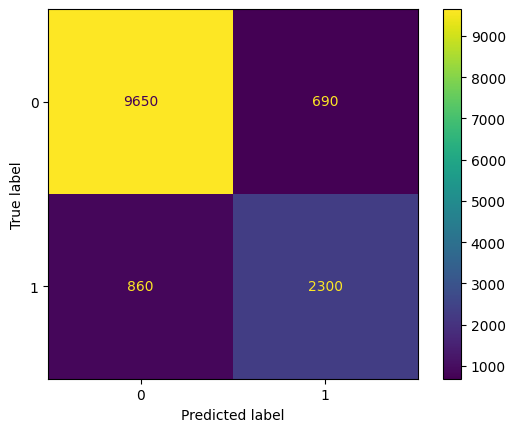

In [54]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, auc, roc_curve,RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay


print("The accuracy is: ", accuracy_score(y_test, y_preds))
print("The classification_report is: ", classification_report(y_test, y_preds))
print("The recall score is: ", recall_score(y_test, y_preds))
print("The f1 score is: ", f1_score(y_test, y_preds))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_preds, y_test)).plot()

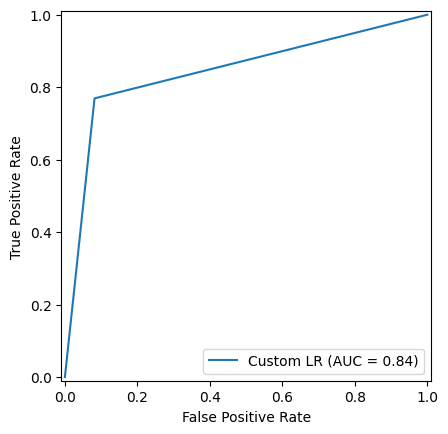

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Custom LR").plot( )

The accuracy is:  0.8936296296296297
The classification_report is:                precision    recall  f1-score   support

           0       0.93      0.93      0.93     10510
           1       0.76      0.75      0.76      2990

    accuracy                           0.89     13500
   macro avg       0.85      0.84      0.84     13500
weighted avg       0.89      0.89      0.89     13500

The recall score is:  0.7508361204013378
The f1 score is:  0.7576780290246372


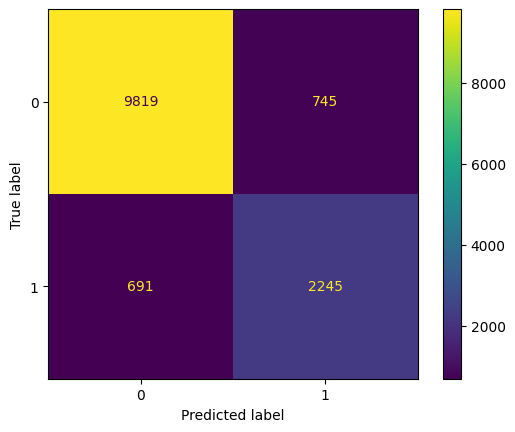

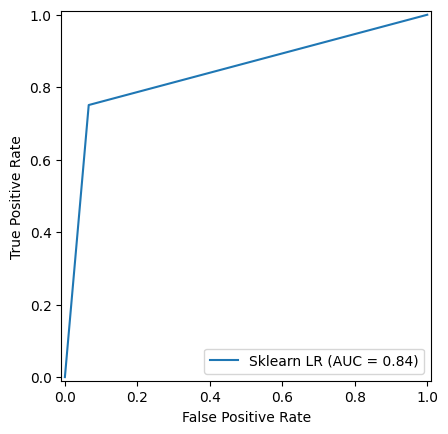

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train_scaled, y_train)

y_preds_lr = lr.predict(X_test_scaled)

print("The accuracy is: ", accuracy_score(y_test, y_preds_lr))
print("The classification_report is: ", classification_report(y_test, y_preds_lr))
print("The recall score is: ", recall_score(y_test, y_preds_lr))
print("The f1 score is: ", f1_score(y_test, y_preds_lr))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_preds_lr, y_test)).plot()

fpr, tpr, thresholds = roc_curve(y_test, y_preds_lr)
roc_auc = auc(fpr, tpr)

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Sklearn LR").plot( )

### Our Logistic Regression model is comparable to the prebuilt model from sklearn, this we can conclude that we have a fairly stable model for binary classification.